In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [17]:
datasets = pd.read_csv('socialnetwork_ads.csv')
print(datasets.head())
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [3]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [4]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)
#print(X_Train)

In [5]:
# Fitting the Logistic Regression into the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_Train,Y_Train)


RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [6]:
# Predicting the test set results

Y_Pred = classifier.predict(X_Test)


In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)

[[64  4]
 [ 4 28]]


Text(0.5, 23.52222222222222, 'Predicted label')

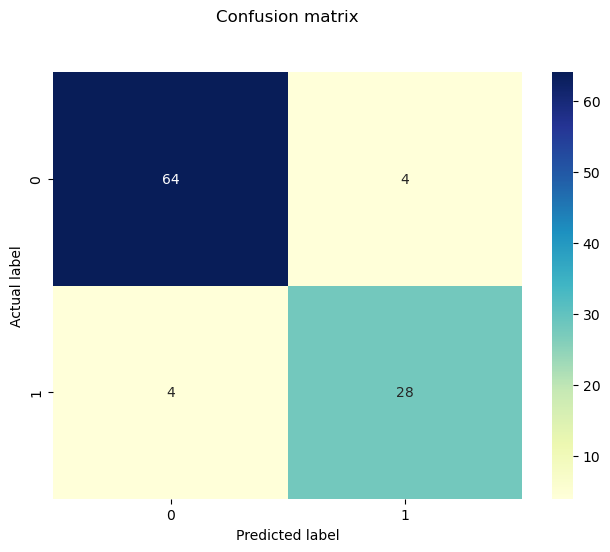

In [8]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [9]:
from sklearn.metrics import log_loss
log_loss(Y_Pred, Y_Test)

2.7631340954900634

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(Y_Test, Y_Pred))
print('Recall: %.3f' % recall_score(Y_Test, Y_Pred))
print('Accuracy: %.3f' % accuracy_score(Y_Test, Y_Pred))
print('F1 Score: %.3f' % f1_score(Y_Test, Y_Pred))

Precision: 0.875
Recall: 0.875
Accuracy: 0.920
F1 Score: 0.875
